In [2]:
import ephem

#Setup our location to Delhi
delhi = ephem.Observer()
delhi.lon =  '77.198'
delhi.lat = '26.60389'
delhi.elevation = 216
type(delhi)

ephem.Observer

In [5]:
#Lets find out about eid sighting for 15 June!
delhi.date = '2018/6/15'
moon = ephem.Moon()
moonset = delhi.next_setting(moon)

sun = ephem.Sun()
sunset = delhi.next_setting(sun)
print("Sunset: " , ephem.localtime(sunset))
print("Moon set: " , ephem.localtime(moonset))
print("Difference in hours: " ,(moonset-sunset)*24)


Sunset:  2018-06-15 19:15:58.000004
Moon set:  2018-06-15 20:54:20.000004
Difference in hours:  1.6394342030980624


In [6]:
# Karwa Chauth
delhi.date = '2018/10/28'
moon = ephem.Moon()

moonrise = delhi.next_rising(moon)
delhi.date = moonrise
moon.compute(delhi)
print("Moon illumination % ", moon.phase)
print(ephem.localtime(moonrise))

Moon illumination %  82.09371948242188
2018-10-28 20:50:48.000006


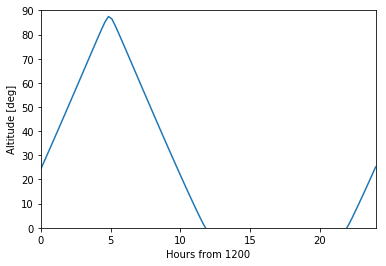

In [13]:
import numpy as np
import matplotlib.pyplot as plt
hours = np.linspace(0, 24, 100)


d = ephem.Date('2018/6/18')
m45 = ephem.star('Alcyone')
def getDelhiAltitude(hour,object):
    delhi.date = d+hour/24
    object.compute(delhi)
    return np.rad2deg(object.alt)

m45alt = np.vectorize(getDelhiAltitude)(hours,m45)

plt.plot(hours, m45alt)
plt.xlim(0, 24)
plt.ylim(0, 90)
plt.xlabel('Hours from 1200')
plt.ylabel('Altitude [deg]')
plt.show()

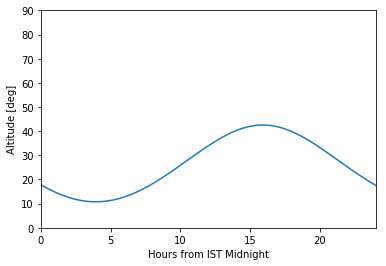

In [12]:
# Kochab Beta Ursa Minoris
kochab =ephem.star('Kochab')
kochabalt = np.vectorize(getDelhiAltitude)(hours,kochab)

plt.plot(hours, kochabalt)
plt.xlim(0, 24)
plt.ylim(0, 90)
plt.xlabel('Hours from IST Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

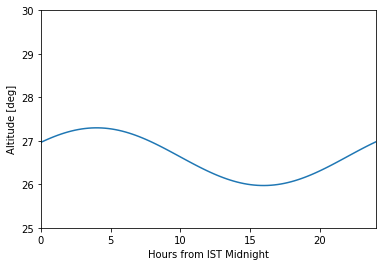

In [17]:
#Pole Star
polaris =ephem.star('Polaris')
polarisalt = np.vectorize(getDelhiAltitude)(hours,polaris)

plt.plot(hours, polarisalt)
plt.xlim(0, 24)
plt.ylim(25, 30)
plt.xlabel('Hours from IST Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

13:24:39.59 54:50:08.7
12:54:49.44 55:51:57.9
12:16:18.75 56:56:10.7
11:54:46.19 53:35:52.8
11:02:54.51 56:17:18.4
11:04:48.96 61:39:25.5
13:48:16.75 49:13:39.1


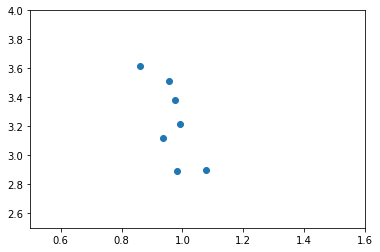

In [21]:
# Lets draw a constellation!
stars = [ephem.star('Mizar'), ephem.star('Alioth'),
         ephem.star('Megrez'),
         ephem.star('Phecda'),ephem.star('Merak'),
         ephem.star('Dubhe')]
alkaid  = ephem.FixedBody()
alkaid.name = "Alkaid"
alkaid._ra = '13:47:33.0'
alkaid._dec = '49:18:48.0'
stars.append(alkaid)
ra=[]
dec=[]
for star in stars:
    star.compute(delhi)
    ra.append(star.ra)
    dec.append(star.dec)
    print(star.ra,star.dec)
plt.xlim(0.5, 1.6)
plt.ylim(2.5, 4)
plt.legend

plt.scatter(dec,ra)
plt.show()

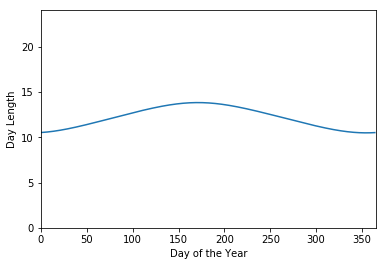

In [12]:
# Day length variation throughout the year
d = ephem.Date('2017/12/31 18:30')
days = range(0,365)
def getDayLength(day):
    delhi.date = d+day
    sun = ephem.Sun()
    return (delhi.next_setting(sun)-delhi.next_rising(sun))*24
daylengths = np.vectorize(getDayLength)(days)

plt.plot(days, daylengths)
plt.xlim(0,365)
plt.ylim(0, 24)
plt.xlabel('Day of the Year')
plt.ylabel('Day Length')
plt.show()

In [13]:

# A bit complicated example for general python
# Jovian Spirals
# EXAMPLE TAKEN FROM PYEPHEM
moons = ((ephem.Io(), 'i'),
         (ephem.Europa(), 'e'),
         (ephem.Ganymede(), 'g'),
         (ephem.Callisto(), 'c'))

# How to place discrete characters on a line that actually represents
# the real numbers -maxradii to +maxradii.

linelen = 65
maxradii = 30.

def put(line, character, radii):
    if abs(radii) > maxradii:
        return
    offset = radii / maxradii * (linelen - 1) / 2
    i = int(linelen / 2 + offset)
    line[i] = character

interval = ephem.hour * 3
now = ephem.now()
now -= now % interval

t = now
while t < now + 2:
    line = [' '] * linelen
    put(line, 'J', 0)
    for moon, character in moons:
        moon.compute(t)
        put(line, character, moon.x)
    print( str(ephem.date(t))[5:], ''.join(line).rstrip())
    t += interval

print( 'East is to the right;')
print( ', '.join([ '%s = %s' % (c, m.name) for m, c in moons ]))

6/15 15:00:00                              e  J    gic
6/15 18:00:00                                eJ    c g
6/15 21:00:00                                 Je  c   g
6/16 00:00:00                                 J ic      g
6/16 03:00:00                                iJ c  e     g
6/16 06:00:00                              i  c      e    g
6/16 09:00:00                            i   cJ       e    g
6/16 12:00:00                           i   c J        e    g
6/16 15:00:00                           i c   J        e    g
6/16 18:00:00                            ci   J        e     g
6/16 21:00:00                           c   i J        e     g
6/17 00:00:00                          c      Ji      e      g
6/17 03:00:00                         c       J  i   e       g
6/17 06:00:00                       c         J    e         g
6/17 09:00:00                      c          J  e  i       g
6/17 12:00:00                     c           Je    i       g
East is to the right;
i = Io, e =